# Roller Coaster

#### Overview

This project is slightly different than others you have encountered thus far. Instead of a step-by-step tutorial, this project contains a series of open-ended requirements which describe the project you'll be building. There are many possible ways to correctly fulfill these requirements, and you should expect to use the internet, Codecademy, and other resources when you encounter a problem that you cannot easily solve.

#### Project Goals

You will work to create several data visualizations that will give you insight into the world of roller coasters.

## Prerequisites

In order to complete this project, you should have completed the first two lessons in the [Data Analysis with Pandas Course](https://www.codecademy.com/learn/data-processing-pandas) and the first two lessons in the [Data Visualization in Python course](https://www.codecademy.com/learn/data-visualization-python). This content is also covered in the [Data Scientist Career Path](https://www.codecademy.com/learn/paths/data-science/).

## Project Requirements

1. Roller coasters are thrilling amusement park rides designed to make you squeal and scream! They take you up high, drop you to the ground quickly, and sometimes even spin you upside down before returning to a stop. Today you will be taking control back from the roller coasters and visualizing data covering international roller coaster rankings and roller coaster statistics.

   Roller coasters are often split into two main categories based on their construction material: **wood** or **steel**. Rankings for the best wood and steel roller coasters from the 2013 to 2018 [Golden Ticket Awards](http://goldenticketawards.com) are provded in `'Golden_Ticket_Award_Winners_Wood.csv'` and `'Golden_Ticket_Award_Winners_Steel.csv'`, respectively. Load each csv into a DataFrame and inspect it to gain familiarity with the data.

In [3]:
# 1
# Import necessary libraries
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from matplotlib import pyplot as plt

# load rankings data
rc_wood_data = pd.read_csv('Golden_Ticket_Award_Winners_Wood.csv')
# load rankings data
rc_steel_data = pd.read_csv('Golden_Ticket_Award_Winners_Steel.csv')

In [13]:
rc_wood_data.head(7)

,Rank,Name,Park,Location,Supplier,Year Built,Points,Year of Rank
0,1,Boulder Dash,Lake Compounce,"Bristol, Conn.",CCI,2000,1333,2013
1,2,El Toro,Six Flags Great Adventure,"Jackson, N.J.",Intamin,2006,1302,2013
2,3,Phoenix,Knoebels Amusement Resort,"Elysburg, Pa.",Dinn/PTC-Schmeck,1985,1088,2013
3,4,The Voyage,Holiday World,"Santa Claus, Ind.",Gravity Group,2006,1086,2013
4,5,Thunderhead,Dollywood,"Pigeon Forge, Tenn.",GCII,2004,923,2013
5,6,Ravine Flyer II,Waldameer,"Erie, Pa.",Gravity Group,2008,712,2013
6,7,Outlaw Run,Silver Dollar City,"Branson, Mo.",Rocky Mountain,2013,599,2013


In [14]:
rc_steel_data.head(7)

,Rank,Name,Park,Location,Supplier,Year Built,Points,Year of Rank
0,1,Millennium Force,Cedar Point,"Sandusky, Ohio",Intamin,2000,1204,2013
1,2,Bizarro,Six Flags New England,"Agawam, Mass.",Intamin,2000,1011,2013
2,3,Expedition GeForce,Holiday Park,"Hassloch, Germany",Intamin,2001,598,2013
3,4,Nitro,Six Flags Great Adventure,"Jackson, N.J.",B&M,2001,596,2013
4,5,Apollo’s Chariot,Busch Gardens Williamsburg,"Williamsburg, Va.",B&M,1999,542,2013
5,6,New Texas Giant,Six Flags Over Texas,"Arlington, Texas",Rocky Mountain,2011,512,2013
6,7,Goliath,Six Flags Over Georgia,"Austell, Ga.",B&M,2006,494,2013


2. Write a function that will plot the ranking of a given roller coaster over time as a line. Your function should take a roller coaster's name and a ranking DataFrame as arguments. Make sure to include informative labels that describe your visualization.

   Call your function with `"El Toro"` as the roller coaster name and the wood ranking DataFrame. What issue do you notice? Update your function with an additional argument to alleviate the problem, and retest your function.

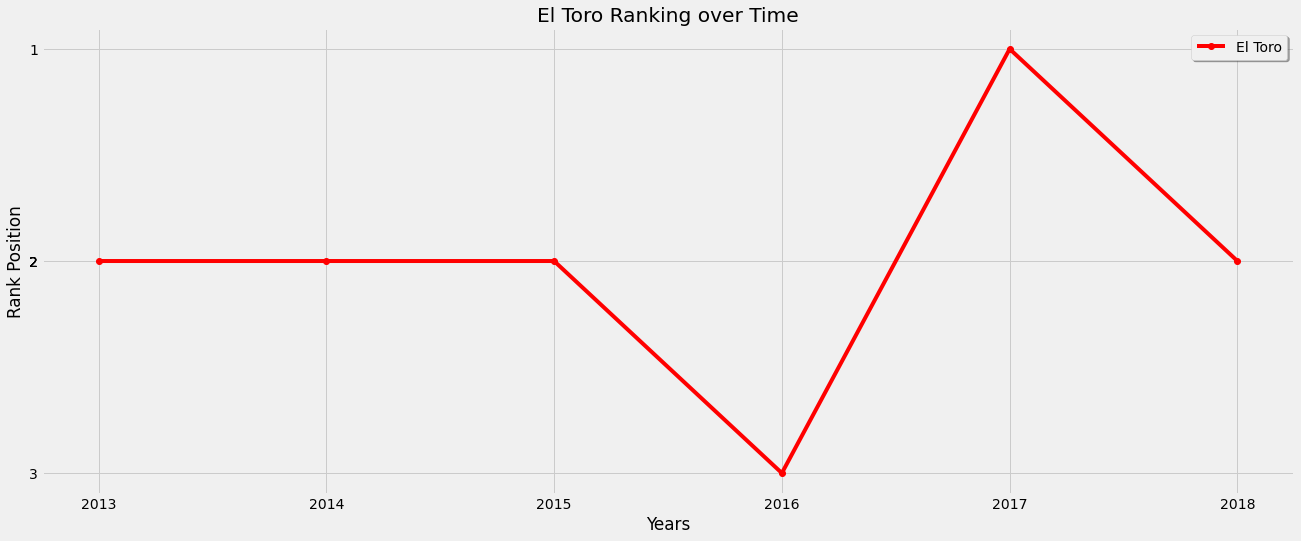

In [15]:
# 2
# Create a function to plot rankings over time for 1 roller coaster
def plotrc(rcname, df, park_name):
    selection = df[['Name', 'Rank', 'Year of Rank', 'Park']]
    selection = df[(df.Name == rcname) & (df.Park == park_name)]
    year_data = selection['Year of Rank'].unique()
    year_data = year_data.tolist()
    x_values = range(len(year_data))
    #rank_data = df.Rank.values
    #results = new_df[(df.Name == rcname)]
    plt.style.use('fivethirtyeight')
    plt.figure(figsize=(20, 8))
    ax = plt.subplot()
    ax.invert_yaxis()
    plt.plot(x_values, selection.Rank.values, marker='o', color='r')
    ax.set_xticks(x_values)
    ax.set_yticks(selection.Rank.values)
    ax.set_xticklabels(year_data)
    plt.title('{} Ranking over Time'.format(rcname))
    plt.xlabel("Years")
    plt.ylabel("Rank Position")
    plt.legend([rcname], shadow=True)


def plotrc2(rcname, df, park_name):
    selection = df[['Name', 'Rank', 'Year of Rank', 'Park']]
    selection = df[(df.Name == rcname) & (df.Park == park_name)]
    fig = px.line(df, x=selection['Year of Rank'], y=selection['Rank'], title='{} Ranking over Time'.format(rcname), color=selection['Name'],  labels={
        "x": "Years",
        "y": "Rank Position"
    }, markers=True, template='plotly_dark')
    fig.update_layout(yaxis=dict(autorange="reversed"))
    lbl = ['1st', '2nd', '3rd']
    fig.update_layout(yaxis=dict(tickmode='array', tickvals=['1','2','3'], ticktext=lbl))
    fig.show()
# Create a plot of El Toro ranking over time
plotrc('El Toro', rc_wood_data, 'Six Flags Great Adventure')

plotrc2('El Toro', rc_wood_data, 'Six Flags Great Adventure')

3. Write a function that will plot the ranking of two given roller coasters over time as lines. Your function should take both roller coasters' names and a ranking DataFrame as arguments. Make sure to include informative labels that describe your visualization.

   Call your function with `"El Toro"` as one roller coaster name, `"Boulder Dash"` as the other roller coaster name, and the wood ranking DataFrame. What issue do you notice? Update your function with two additional arguments to alleviate the problem, and retest your function.

In [19]:
# 3
# Create a function to plot rankings over time for 2 roller coasters
def plot2rc(rcname1, rcname2, df, park_name, park_name2):
    selection1 = df[(df.Name == rcname1) & (df.Park == park_name)]
    selection2 = df[(df.Name == rcname2) & (df.Park == park_name2)]

    plt.style.use('fivethirtyeight')
    plt.figure(figsize=(20, 10))
    ax = plt.subplot()
    ax.invert_yaxis()

    plt.plot(selection1['Year of Rank'],
             selection1.Rank.values,
             marker='o',
             color='r')
    plt.plot(selection2['Year of Rank'],
             selection2.Rank.values,
             marker='o',
             color='b')
    ax.set_yticks(selection2.Rank.values)

    plt.title('{} & {} Ranking over Time'.format(rcname1, rcname2))
    plt.xlabel("Years")
    plt.ylabel("Rank Position")
    plt.legend([rcname1, rcname2])

def plot2rc_p(rcname1, rcname2, df, park_name, park_name2):
    selection1 = df[(df.Name == rcname1) & (df.Park == park_name)]
    selection2 = df[(df.Name == rcname2) & (df.Park == park_name2)]
    
    fig = go.Figure(layout=go.Layout(height=600, width=970))
    # Create and style traces
    fig.add_trace(go.Scatter(x=selection1['Year of Rank'], y=selection1.Rank.values, name=rcname1))
    fig.add_trace(go.Scatter(x=selection2['Year of Rank'], y=selection2.Rank.values, name = rcname2))
    fig.update_layout(yaxis=dict(autorange="reversed"))
    lbl = ['1st', '2nd', '3rd', '4th']
    fig.update_layout(yaxis=dict(tickmode='array', tickvals=['1','2','3','4'], ticktext=lbl))
    fig.update_layout(title='{} & {} Ranking over Time'.format(rcname1, rcname2), 
                   xaxis_title='Year',
                   yaxis_title='Position')
    fig.update_layout(template='plotly_dark')
    fig.show()


# Create a plot of El Toro and Boulder Dash roller coasters
#plot2rc('El Toro', 'Phoenix', rc_wood_data, 'Six Flags Great Adventure',
#        'Knoebels Amusement Resort')

plot2rc_p('El Toro', 'Phoenix', rc_wood_data, 'Six Flags Great Adventure',
        'Knoebels Amusement Resort')

4. Write a function that will plot the ranking of the top `n` ranked roller coasters over time as lines. Your function should take a number `n` and a ranking DataFrame as arguments. Make sure to include informative labels that describe your visualization.

   For example, if `n == 5`, your function should plot a line for each roller coaster that has a rank of `5` or lower.
   
   Call your function with a value of `n` and either the wood ranking or steel ranking DataFrame.

In [17]:
# 4
# Create a function to plot top n rankings over time
import numpy as np


def plotn(n, df):
    rankingdf = df[df['Rank'] <= n]

    fig, ax = plt.subplots(figsize=(20, 14))

    colormap = plt.cm.Spectral
    colors = [colormap(i) for i in np.linspace(0, 1, 9)]

    ax.set_prop_cycle('color', colors)
    plt.style.use('classic')

    for x in set(rankingdf['Name']):
        coaster_rankings = rankingdf[rankingdf['Name'] == x]
        ax.plot(coaster_rankings['Year of Rank'],
                coaster_rankings['Rank'],
                label=x,
                marker='o', linewidth=2.2)
        ax.legend(loc = 8, prop={'size': 16})
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)


    ax.invert_yaxis()
    ax.set_yticks([i for i in range(1, 6)])
    plt.title("Top 10 Rankings",
              fontdict={
                  'family': 'serif',
                  'color': 'black',
                  'weight': 'bold',
                  'size': 20
              })
    font = {'family': 'serif', 'color': 'black', 'weight': 'bold', 'size': 16}
    plt.xlabel('Year', fontdict=font)
    plt.ylabel('Ranking', fontdict=font)

def plotn_p(n, df):
    rankingdf = df[df['Rank'] <= n]
    fig = px.line(rankingdf, x=rankingdf['Year of Rank'], y=rankingdf.Rank.values, color='Name', markers=True)
    fig.update_layout(yaxis=dict(autorange="reversed"))
    lbl = ['1st', '2nd', '3rd', '4th', '5th']
    fig.update_layout(yaxis=dict(tickmode='array', tickvals=['1','2','3','4', '5'], ticktext=lbl))
    fig.update_layout(title='Top 10 Rankings', 
                   xaxis_title='Year',
                   yaxis_title='Position')
    fig.update_layout(template='plotly_dark')
    fig.show()
'''
    for x in set(rankingdf['Name']):
        coaster_rankings = rankingdf[rankingdf['Name'] == x]
        fig = go.Figure(layout=go.Layout(height=600, width=970))'''
    # Create and style traces
        #fig.add_trace(go.Scatter(x=coaster_rankings['Year of Rank'], y=coaster_rankings.Rank.values))


# Create a plot of top n rankings over time
#plotn(5, rc_wood_data)

plotn_p(5, rc_wood_data)

In [7]:
rankingdf2 = rc_wood_data[rc_wood_data['Rank'] <= 5]
rankingdf2 = rankingdf2.sort_values(by=['Name', 'Year of Rank'])
rankingdf2

,Rank,Name,Park,Location,Supplier,Year Built,Points,Year of Rank
134,5,Beast,Kings Island,"Mason, Ohio",KECO,1979,781,2018
0,1,Boulder Dash,Lake Compounce,"Bristol, Conn.",CCI,2000,1333,2013
10,1,Boulder Dash,Lake Compounce,"Bristol, Conn.",CCI,2000,1480,2014
20,1,Boulder Dash,Lake Compounce,"Bristol, Conn.",CCI,2000,1625,2015
30,1,Boulder Dash,Lake Compounce,"Bristol, Conn.",Custom Coasters,2000,1216,2016
82,3,Boulder Dash,Lake Compounce,"Bristol, Conn.",Custom Coasters,2000,1171,2017
133,4,Boulder Dash,Lake Compounce,"Bristol, Conn.",Custom Coasters,2000,982,2018
1,2,El Toro,Six Flags Great Adventure,"Jackson, N.J.",Intamin,2006,1302,2013
11,2,El Toro,Six Flags Great Adventure,"Jackson, N.J.",Intamin,2006,1291,2014
21,2,El Toro,Six Flags Great Adventure,"Jackson, N.J.",Intamin,2006,1464,2015


5. Now that you've visualized rankings over time, let's dive into the actual statistics of roller coasters themselves. [Captain Coaster](https://captaincoaster.com/en/) is a popular site for recording roller coaster information. Data on all roller coasters documented on Captain Coaster has been accessed through its API and stored in `roller_coasters.csv`. Load the data from the csv into a DataFrame and inspect it to gain familiarity with the data.

In [21]:
# 5
# load roller coaster data
rc_data = pd.read_csv('roller_coasters.csv')

mean_value=rc_data['speed'].mean()
  
# Replace NaNs in column S2 with the
# mean of values in the same column
rcdata_w = rc_data['speed'].fillna(value=mean_value, inplace=True)

max = np.amax(rc_data['speed'].values)
max

rc_data.loc[rc_data['num_inversions'] == 0.0, 'num_inversions'] = 0.1
rc_data


,name,material_type,seating_type,speed,height,length,num_inversions,manufacturer,park,status
0,Goudurix,Steel,Sit Down,75.000000,37.0,950.0,7.0,Vekoma,Parc Asterix,status.operating
1,Dream catcher,Steel,Suspended,45.000000,25.0,600.0,0.1,Vekoma,Bobbejaanland,status.operating
2,Alucinakis,Steel,Sit Down,30.000000,8.0,250.0,0.1,Zamperla,Terra Mítica,status.operating
3,Anaconda,Wooden,Sit Down,85.000000,35.0,1200.0,0.1,William J. Cobb,Walygator Parc,status.operating
4,Azteka,Steel,Sit Down,55.000000,17.0,500.0,0.1,Soquet,Le Pal,status.operating
...,...,...,...,...,...,...,...,...,...,...
2797,Dragon Challenge,Steel,Sit Down,70.102842,NaN,NaN,0.1,Pinfari,Barry Island Pleasure Park,status.operating
2798,Wild Mouse,Steel,Spinning,70.102842,NaN,NaN,0.1,Reverchon,Barry Island Pleasure Park,status.operating
2799,Unnamed Atlantica Supersplash Clone,Steel,Sit Down,80.000000,30.0,390.0,0.1,Mack,Le Pal,status.announced
2800,Unknown Duelling Launch Coaster,Steel,na,70.102842,NaN,NaN,0.1,na,Universal's Epic Universe,status.rumored


6. Write a function that plots a histogram of any numeric column of the roller coaster DataFrame. Your function should take a DataFrame and a column name for which a histogram should be constructed as arguments. Make sure to include informative labels that describe your visualization.

   Call your function with the roller coaster DataFrame and one of the column names.

In [23]:
# 6
# Create a function to plot histogram of column values
def ploth(df, column_name):
    #plt.style.use('tableau-colorblind10')
    plt.style.use('ggplot')
    plt.figure(figsize=(5, 3))
    plt.hist(df[column_name].dropna())
    plt.xlabel(column_name)
    plt.ylabel("Frequency")
    plt.title('{} distribution'.format(column_name))
    
def ploth_p(df, column_name):
    
    df = df[column_name].dropna()
    fig = px.histogram(df, x=column_name)
    fig.update_layout(title='{} distribution'.format(column_name), 
                   xaxis_title=column_name,
                   yaxis_title='Frequency')
    fig.update_layout(template='plotly_dark')
    
    fig.show()

# Create histogram of roller coaster speed
#ploth(rc_data, 'speed')
ploth_p(rc_data, 'speed')


# Create histogram of roller coaster length
#ploth(rc_data, 'length')


In [24]:
# Create histogram of roller coaster number of inversions
#ploth(rc_data, 'num_inversions')

# Create a function to plot histogram of height values

# Create a histogram of roller coaster height


7. Write a function that creates a bar chart showing the number of inversions for each roller coaster at an amusement park. Your function should take the roller coaster DataFrame and an amusement park name as arguments. Make sure to include informative labels that describe your visualization.

   Call your function with the roller coaster DataFrame and amusement park name.

In [249]:
# 7
# Create a function to plot inversions by coaster at park
def ploti(df, park):

    # colormap = plt.cm.seismic
    # colors = [colormap(i) for i in np.linspace(0, 1, 9)]

    selection = df[df['park'] == park]
    coaster_n = selection['name']
    fig = px.bar(df, x=selection['name'], y=selection['num_inversions'], title='Number of Inversions Per Coaster at {}'.format(
        park), template='plotly_dark', color=selection['num_inversions'],  labels={
        "x": "Park",
        "y": "# of Inversions"
    },).update_xaxes(categoryorder="total descending")
    fig.show()

    # plt.figure(figsize=(10,5))
    # ax = plt.subplot()


''''
    plt.bar(range(len(selection['num_inversions'])),
            selection['num_inversions'].sort_values(), color=colors)

    ax.set_xticks(range(len(coaster_n)))
    ax.set_xticklabels(coaster_n, rotation=90)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    # plt.legend()
    font = {'family': 'serif', 'color': 'black', 'weight': 'bold', 'size': 10}
    plt.ylabel("# of inversions", fontdict=font)
    plt.title('Number of Inversions Per Coaster at {}'.format(park), fontdict={
                  'family': 'serif',
                  'color': 'black',
                  'weight': 'bold',
                  'size': 12
              })
'''


# Create barplot of inversions by roller coasters
ploti(rc_data, 'Six Flags Great Adventure')


'''  park_coasters = coaster_df[coaster_df['park'] == park_name]
  park_coasters = park_coasters.sort_values('num_inversions', ascending=False)
  coaster_names = park_coasters['name']
  number_inversions = park_coasters['num_inversions']
  plt.bar(range(len(number_inversions)),number_inversions)
  ax = plt.subplot()
  ax.set_xticks(range(len(coaster_names)))
  ax.set_xticklabels(coaster_names,rotation=90)'''

"  park_coasters = coaster_df[coaster_df['park'] == park_name]\n  park_coasters = park_coasters.sort_values('num_inversions', ascending=False)\n  coaster_names = park_coasters['name']\n  number_inversions = park_coasters['num_inversions']\n  plt.bar(range(len(number_inversions)),number_inversions)\n  ax = plt.subplot()\n  ax.set_xticks(range(len(coaster_names)))\n  ax.set_xticklabels(coaster_names,rotation=90)"

8. Write a function that creates a pie chart that compares the number of operating roller coasters (`'status.operating'`) to the number of closed roller coasters (`'status.closed.definitely'`). Your function should take the roller coaster DataFrame as an argument. Make sure to include informative labels that describe your visualization.

   Call your function with the roller coaster DataFrame.

In [250]:
# 8
# Create a function to plot a pie chart of status.operating
def pieplot(df):
    df_p = rc_data[rc_data.status.isin(['status.operating','status.closed.definitely'])].groupby('status').name.count()
    #plt.pie(df_p, labels=df_p.index, autopct='%0.1f%%')
    fig = px.pie(df_p, values = df_p.values, names=df_p.index, title = 'Operating roller coasters vs Closed roller coasters', hole=.6, template='plotly_dark')
    #plt.axis('equal') 
    fig.show()
    
# Create pie chart of roller coasters
pieplot(rc_data)
#values='Count'



In [113]:
df_p = rc_data.groupby('manufacturer').name.count()
df_p

manufacturer
ACE Coaster Classic          4
ART Engineering              4
Abc rides                   14
Allan Herschell Company      4
Arrow                       90
                          ... 
William Strickler            1
Wisdom Rides                27
Zamperla                   160
Zierer                     140
na                         305
Name: name, Length: 122, dtype: int64

9. `.scatter()` is another useful function in matplotlib that you might not have seen before. `.scatter()` produces a scatter plot, which is similar to `.plot()` in that it plots points on a figure. `.scatter()`, however, does not connect the points with a line. This allows you to analyze the relationship between two variables. Find [`.scatter()`'s documentation here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html).

   Write a function that creates a scatter plot of two numeric columns of the roller coaster DataFrame. Your function should take the roller coaster DataFrame and two-column names as arguments. Make sure to include informative labels that describe your visualization.
   
   Call your function with the roller coaster DataFrame and two-column names.

In [251]:
# 9
# Create a function to plot scatter of any two columns
def scatter(df, column1, column2):
    fig = px.scatter(df,
                     x=column1,
                     y=column2,
                     title=('Scatter Plot of {} vs {}'.format(
                         column2, column1)),
                     width=900,
                     height=600,
                     color="speed",
                     color_discrete_sequence=px.colors.sequential.Plasma_r,
                     size=df['speed'],
                     hover_data=['name'], template='plotly_dark')
    fig.show()


# Create a function to plot scatter of speed vs height

# Create a scatter plot of roller coaster height by speed
scatter(rc_data, 'speed', 'height')

scatter(rc_data, 'seating_type', 'speed')

10. Part of the fun of data analysis and visualization is digging into the data you have and answering questions that come to your mind.

    Some questions you might want to answer with the datasets provided include:
    - What roller coaster seating type is most popular? And do different seating types result in higher/faster/longer roller coasters?
    - Do roller coaster manufactures have any specialties (do they focus on speed, height, seating type, or inversions)?
    - Do amusement parks have any specialties?
    
    What visualizations can you create that answer these questions, and any others that come to you? Share the questions you ask and the accompanying visualizations you create on the Codecademy forums.

## Solution

Great work! Visit [our forums](https://discuss.codecademy.com/t/roller-coaster-challenge-project-python-pandas/462378) or the file **Roller Coaster_Solution.ipynb** to compare your project to our sample solution code. You can also learn how to host your own solution on GitHub so you can share it with other learners! Your solution might look different from ours, and that's okay! There are multiple ways to solve these projects, and you'll learn more by seeing others' code.

In [25]:
import sys
print(sys.version)

3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]


In [4]:
print('pandas=='+pd.__version__)
print('plotly=='+plotly.__version__)
print('matplotlib=='+matplotlib.__version__)

pandas==1.3.4


NameError: name 'plotly' is not defined